# Visualization of the Euro-USD Exchange Rate During 2007-2008 Financial Crisis

This dataset contains the daily exchange rates for the Euro between 1999 and 2021. The dataset is collected by Daria Chemkaeva on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020). This version of the dataset was downloaded `16.05.2021`.

We will explore the impact of the 2007-2008 financial crisis on the Euro-USD exchange rate.

In [1]:
#importing dataset and libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime as dt

exchange_rates = pd.read_csv("euro_daily_hist_1999_2020.csv")

## Cleaning the data

In [2]:
#initial exploration of the data
exchange_rates.info()
display(exchange_rates.head())
display(exchange_rates.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


Some of the columns are of numeric type while others are object type. We will convert all columns, except `Period\Unit`, to a numeric type to be able to perform statistics on the data. `Period\Unit` will be changed to a `datetime` type.

Some of the columns also have significant number of null-values; we will investigate this. We will also change the name of the columns to make them easier to work with.

### Cleaning column names

In [3]:
exchange_rates.columns = exchange_rates.columns.str.replace('[', '').str.replace(' ]', '').str.replace(' ', '_')
exchange_rates.rename(columns={'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True) #sorting by time in ascending order
exchange_rates.reset_index(drop=True, inplace=True) #resetting index after sort and dropping the old index

exchange_rates.tail()

C:\Users\Mats\AppData\Local\Temp\ipykernel_19792\3367438067.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exchange_rates.columns = exchange_rates.columns.str.replace('[', '').str.replace(' ]', '').str.replace(' ', '_')
C:\Users\Mats\AppData\Local\Temp\ipykernel_19792\3367438067.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exchange_rates.columns = exchange_rates.columns.str.replace('[', '').str.replace(' ]', '').str.replace(' ', '_')


,Time,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
5776,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875
5777,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
5778,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
5779,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
5780,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081


### Preparing comparison between the Euro and the US dollar

We will focus on the comparison between the Euro and the US dollar. We therefore create a new dataframe containing only the `Time` and `US_dollar` columns.

In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar.value_counts().tail(50))

Time        US_dollar
2006-07-24  1.2633       1
2006-07-21  1.2680       1
2006-07-20  1.2643       1
2006-07-19  1.2482       1
2006-06-15  1.2610       1
2006-06-13  1.2571       1
2006-04-13  1.2094       1
2006-06-12  1.2572       1
2006-05-10  1.2779       1
2006-05-09  1.2697       1
2006-05-08  1.2756       1
2006-05-05  1.2688       1
2006-05-04  1.2592       1
2006-05-03  1.2622       1
2006-05-02  1.2643       1
2006-05-01  -            1
2006-04-28  1.2537       1
2006-04-27  1.2414       1
2006-04-26  1.2425       1
2006-04-25  1.2425       1
2006-04-24  1.2365       1
2006-04-21  1.2315       1
2006-04-20  1.2346       1
2006-04-19  1.2346       1
2006-04-18  1.2252       1
2006-04-17  -            1
2006-04-14  -            1
2006-05-11  1.2716       1
2006-05-12  1.2914       1
2006-05-15  1.2826       1
2006-05-30  1.2839       1
2006-06-09  1.2659       1
2006-06-08  1.2735       1
2006-06-07  1.2789       1
2006-06-06  1.2847       1
2006-06-05  1.2958       1
2006-0

Some of the rows contain the character `-`. We will drop all these rows.

In [5]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'].str.contains('-') == False]

print(euro_to_dollar.value_counts().tail(50))

Time        US_dollar
2006-08-11  1.2775       1
2006-08-10  1.2857       1
2006-08-09  1.2879       1
2006-08-08  1.2839       1
2006-08-07  1.2850       1
2006-07-04  1.2791       1
2006-07-03  1.2790       1
2006-06-30  1.2713       1
2006-05-17  1.2882       1
2006-05-29  1.2758       1
2006-05-26  1.2797       1
2006-05-25  1.2755       1
2006-05-24  1.2851       1
2006-05-23  1.2841       1
2006-05-22  1.2753       1
2006-05-19  1.2767       1
2006-05-18  1.2770       1
2006-05-16  1.2817       1
2006-05-31  1.2868       1
2006-05-15  1.2826       1
2006-05-12  1.2914       1
2006-05-11  1.2716       1
2006-05-10  1.2779       1
2006-05-09  1.2697       1
2006-05-08  1.2756       1
2006-05-05  1.2688       1
2006-05-04  1.2592       1
2006-05-30  1.2839       1
2006-06-01  1.2736       1
2006-06-29  1.2529       1
2006-06-16  1.2651       1
2006-06-28  1.2570       1
2006-06-27  1.2567       1
2006-06-26  1.2561       1
2006-06-23  1.2502       1
2006-06-22  1.2582       1
2006-0

Next, we will convert the `US_dollar` column to the float type.

In [6]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64')
euro_to_dollar.dtypes

Time         datetime64[ns]
US_dollar           float64
dtype: object

On creating the new `euro_to_dollar` dataframe, pandas automatically cast the `Time` column as `datetime64` so we don't need to manually change it.

## Exploring the data

We will visualize the Euro to US dollar exchange rate over the whole period of the dataset.

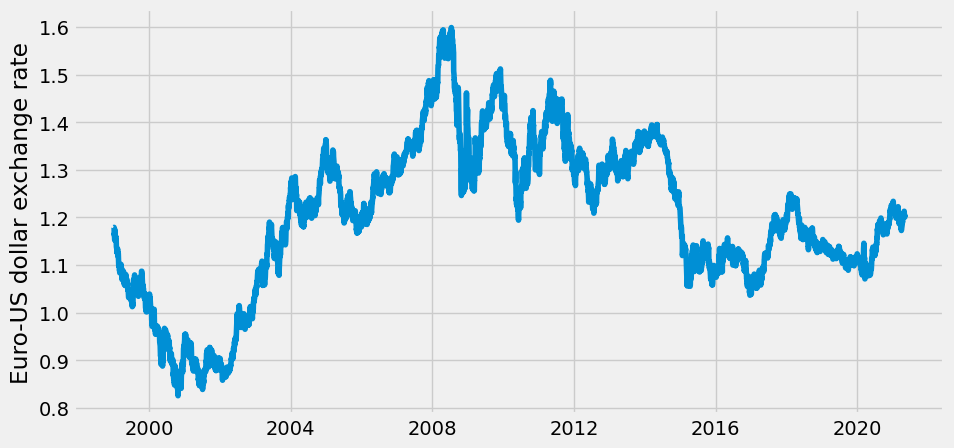

In [7]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
ax.set_xlabel('')
ax.set_ylabel('Euro-US dollar exchange rate')
plt.show()

This graph is very jagged due to the daily fluctuations in the exchange rate. We will use a `moving average` with different parameters to create alternate version of the graph that shows the long term trends in the exchange rate, instead of the day to day fluctuations.

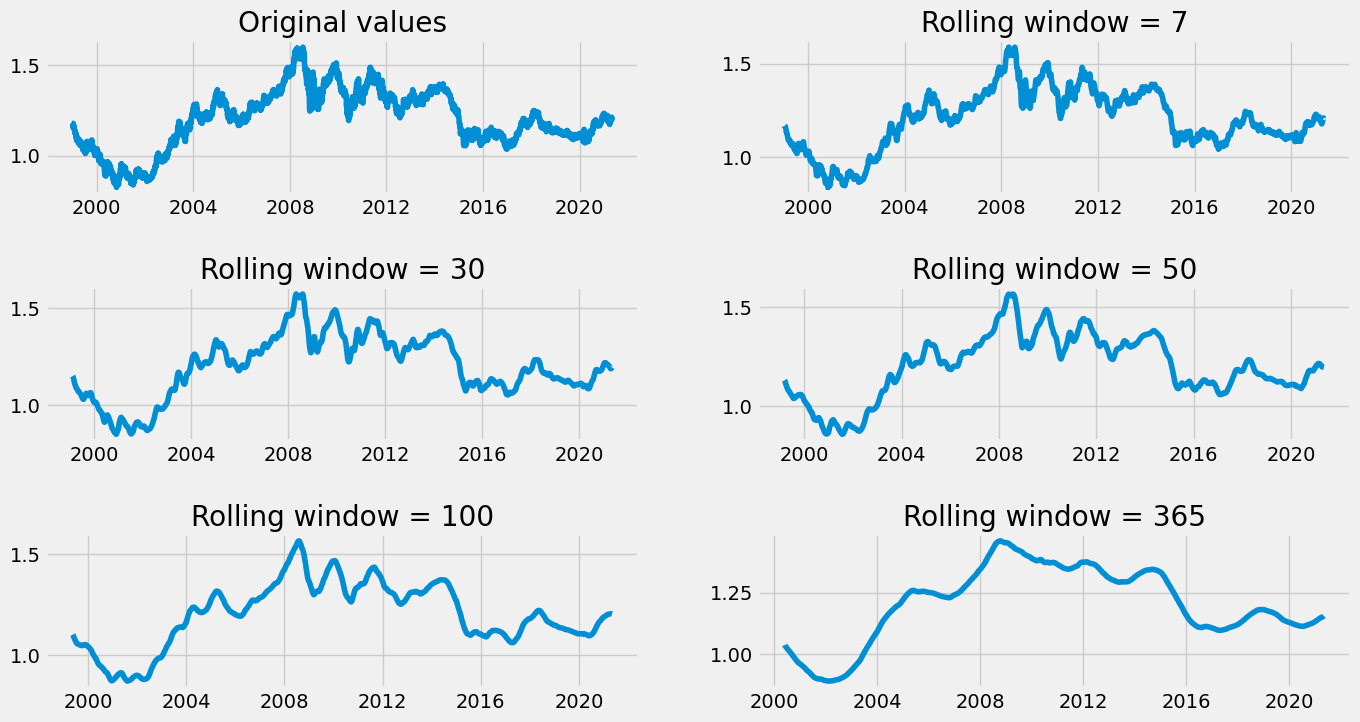

In [8]:
euro_to_dollar['rolling_mean_7'] = euro_to_dollar['US_dollar'].rolling(7).mean() 
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean() 
euro_to_dollar['rolling_mean_50'] = euro_to_dollar['US_dollar'].rolling(50).mean() 
euro_to_dollar['rolling_mean_100'] = euro_to_dollar['US_dollar'].rolling(100).mean()
euro_to_dollar['rolling_mean_365'] = euro_to_dollar['US_dollar'].rolling(365).mean()  

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(15, 8)
fig.subplots_adjust(hspace=0.6)
ax[0,0].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
ax[0,0].set_title('Original values')

ax[0,1].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_7'])
ax[0,1].set_title('Rolling window = 7')

ax[1,0].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_30'])
ax[1,0].set_title('Rolling window = 30')

ax[1,1].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_50'])
ax[1,1].set_title('Rolling window = 50')

ax[2,0].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_100'])
ax[2,0].set_title('Rolling window = 100')

ax[2,1].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_365'])
ax[2,1].set_title('Rolling window = 365')

plt.show()

## Comparing the Euro-USD exchange rate during the financial crisis

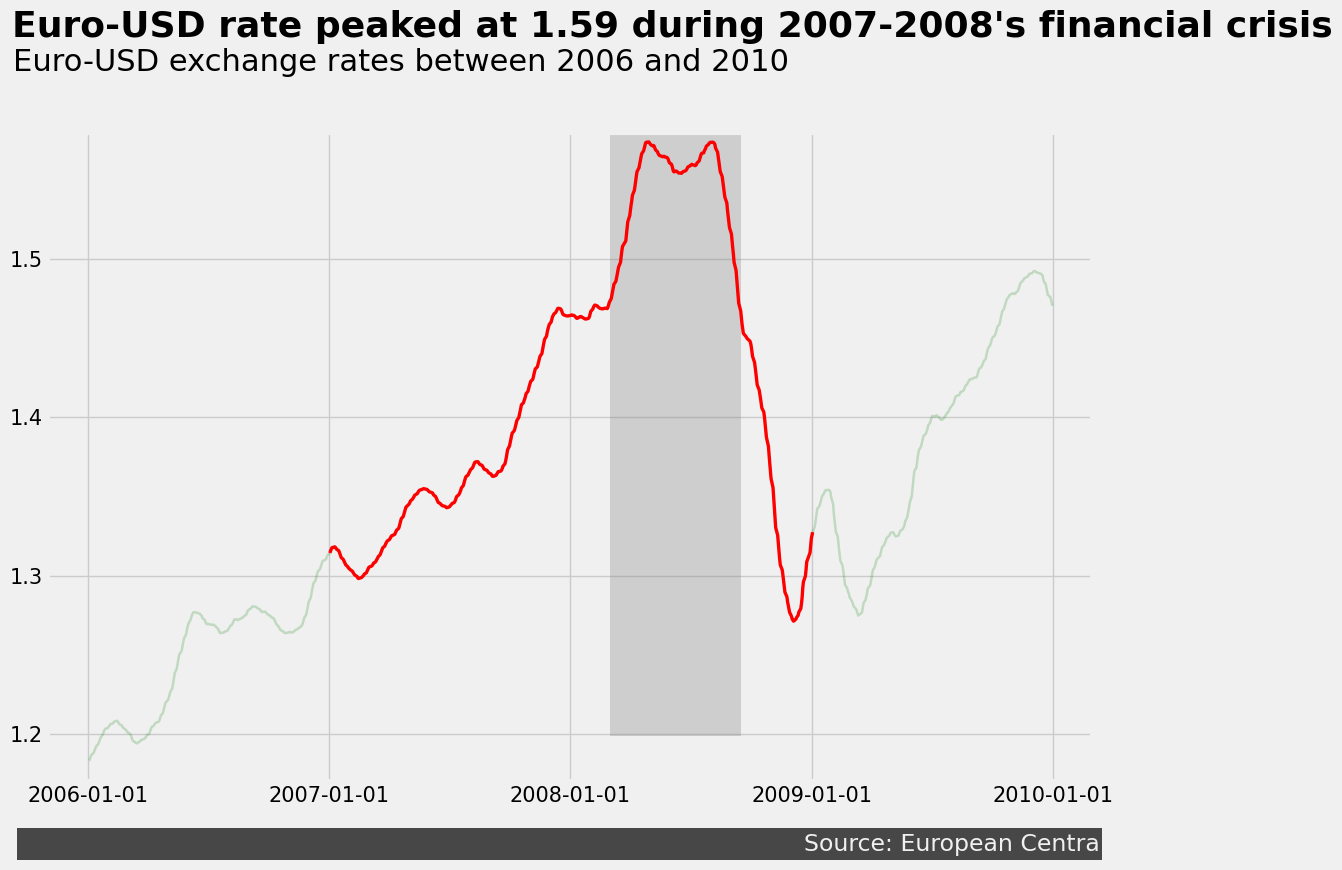

In [9]:
#splitting the graph into three different sections based on the years
time_2006_2007 = euro_to_dollar[euro_to_dollar['Time'].between(dt(2006,1,1), dt(2007,1,2))]
time_2007_2009 = euro_to_dollar[euro_to_dollar['Time'].between(dt(2007,1,1), dt(2009,1,2))]
time_2009_2010 = euro_to_dollar[euro_to_dollar['Time'].between(dt(2009,1,1), dt(2010,1,1))]

#new [xy]ticks
x_tick_loc = [dt(2006,1,1), dt(2007,1,1), dt(2008,1,1), dt(2009,1,1), dt(2010,1,1)]
y_tick_loc = [1.2, 1.3, 1.4, 1.5]
#x_tick_label = pass

#plotting the whole graph and adjusting parameters
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.plot(euro_to_dollar['Time'] > dt(2005,12,31), euro_to_dollar['rolling_mean_30'], alpha=0.8, linewidth=0.5)

#adjusting xy limits
ax.set_xlim(dt(2005, 11, 1), dt(2010, 3, 1))
ax.set_ylim(1.17, 1.58)

#creating and adjusting ticks
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks([])
ax.set_xticks(x_tick_loc)
ax.set_yticks([])
ax.set_yticks(y_tick_loc)

#creating horizontal and vertical bars and adding text
ax.set_xlabel('')
ax.axvspan(dt(2008, 3, 1), dt(2008, 9, 15), ymin=0.07, ymax=1, facecolor='grey', alpha=0.3)
ax.axhspan(1.12, 1.14, xmin=-0.03, xmax=1.01, clip_on=False, facecolor='black', alpha=0.7)
plt.figtext(0.71,-0.018, 'Source: European Central Bank', color='#f0f0f0', fontsize=17)
plt.figtext(0.05, 1.0, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
            fontsize=26, weight='black')
plt.figtext(0.051, 0.958, "Euro-USD exchange rates between 2006 and 2010", fontsize=22)

#plotting the three separate sections of the graph
ax.plot(time_2006_2007['Time'], time_2006_2007['rolling_mean_30'], color='green', linewidth=1.8, alpha=0.2)
ax.plot(time_2007_2009['Time'], time_2007_2009['rolling_mean_30'], color='red', linewidth=2.4)
ax.plot(time_2009_2010['Time'], time_2009_2010['rolling_mean_30'], color='green', linewidth=1.8, alpha=0.2)

plt.show()

## Conclusion

The financial crisis had a significant impact on the Euro-USD exchange rates. As the dollar weakened during the crisis the exchange rate increased. The exchange rate climbed quickly from the beginning of 2007 until reaching a peak of ~1.59 around April 2008.